# **Outlier Detection and Removal Using IQR**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Supervised Learning/Some Important Topic for Machine Learning/Features Engineering /Outliers find/height3.csv")
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [ ]:
df.shape

(20, 2)

In [ ]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


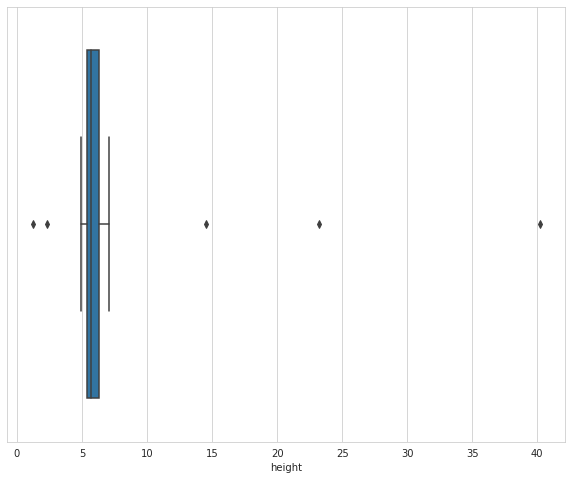

In [ ]:
# before remove the outlier
plt.figure(figsize=(10,8))
sns.set_style(style="whitegrid")
sns.boxplot("height",data=df)
plt.show()

In [ ]:
Q1 = df.height.quantile(q=0.25)
Q3 = df.height.quantile(q=0.75)
Q1,Q3

(5.3500000000000005, 6.275)

In [ ]:
IQR = Q3-Q1
IQR

0.9249999999999998

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(3.962500000000001, 7.6625)

In [ ]:
df[(df.height<lower_limit) | (df.height>upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


# Remove **Outliers**

In [ ]:
no_outliers = df[(df.height>lower_limit) & (df.height<upper_limit)]
no_outliers

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


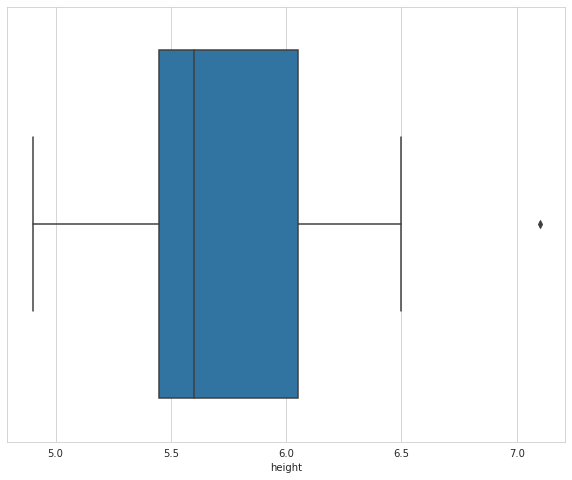

In [ ]:
# after remove the outlier
plt.figure(figsize=(10,8))
sns.set_style(style="whitegrid")
sns.boxplot("height",data=no_outliers)
plt.show()

# **Exercise**

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Machine Learning/Supervised Learning/Some Important Topic for Machine Learning/Features Engineering /Outliers find/height_weight.csv")
df2.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Histgram for weights

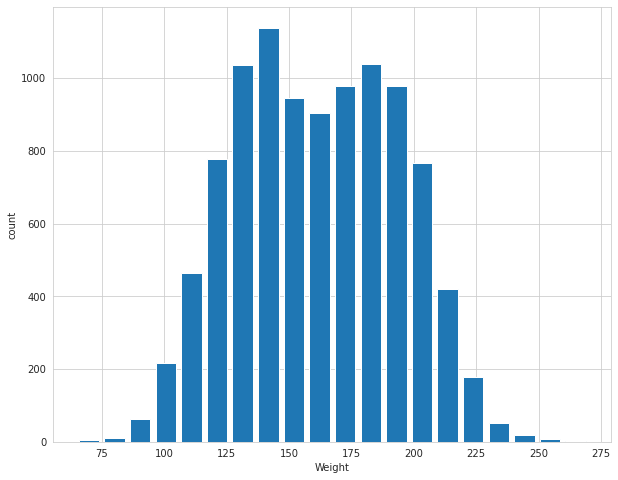

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(x=df2.weight,bins=20,rwidth=0.8)
plt.xlabel("Weight")
plt.ylabel("count")
plt.show()

# Histgram for **heights**

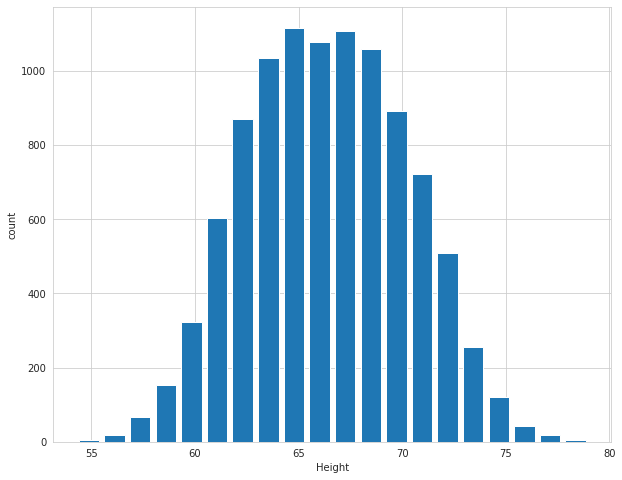

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(x=df2.height,bins=20,rwidth=0.8)
plt.xlabel("Height")
plt.ylabel("count")
plt.show()

# **Detect outliers based on weight**

In [ ]:
Q1 = df2.weight.quantile(0.25)
Q3 = df2.weight.quantile(0.75)
Q1,Q3

(135.8180513055015, 187.16952486868348)

In [ ]:
IQR = Q3-Q1
IQR

51.35147356318197

In [ ]:
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR
min_limit,max_limit

(58.79084096072856, 264.19673521345646)

In [ ]:
df2.weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: weight, dtype: float64

In [ ]:
# outliers
df2[(df2.weight<min_limit) | (df2.weight>max_limit)]

,gender,height,weight
2014,Male,78.998742,269.989699


# **Detect outliers based on height**

In [ ]:
Q1 = df2.height.quantile(0.25)
Q3 = df2.height.quantile(0.75)
Q1,Q3

(63.505620481218955, 69.1742617268347)

In [ ]:
IQR = Q3-Q1
IQR

5.668641245615746

In [ ]:
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR
min_limit,max_limit

(55.00265861279534, 77.67722359525831)

In [ ]:
# outliers
df2[(df2.height<min_limit) | (df2.height>max_limit)]

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127
